# Street Trees in Oakland

## An exploration of the open dataset from the City of Oakland containing details on trees under municipal jurisdiction



#### First I will be importing the following Libraries: pandas, geopandas (for data exploration), contextily, osmnx, and folium (for mapping)

#### I will then be importing the dataset titled 'Trees Sidewalk Raw' sourced from the city of Oakland's opendata portal

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import osmnx as ox

import folium

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
oakt = gpd.read_file('https://opendata.arcgis.com/datasets/385456a220174ef1854738b4029df3fd_0.geojson')

## Data Exploration

#### First I will look at the dataset and check to see what information it contains, how it is laid out, etc. then I will see how many tree species there are and begin to make lists of specific tree families, types, or whatever else we decide is important to our resarch question.

#### Cleaning up the columns will help simplify my analysis

In [3]:
oakt.shape

(42661, 51)

In [4]:
type(oakt)

geopandas.geodataframe.GeoDataFrame

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
oakt.sample()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
31189     31190       447          7          7        8  8/22/06  13:47:06   

       LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
31189     223.0   -1    0         0          0       5.50    None   0     0   

      BRKNHNGLMB OPENCAVITY STRCTRCNT   LOWLIMB TRNKLEAN              SPECIES  \
31189          0          0         0  Sidewalk     None  Albizia julibrissin   

      WATERMET FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
31189        0       0        0         0        0     Small  None         -1   

                   TREE_KEY  ADDRNUM   STNAME IS_PROBLEM DEAD DEADWOOD  \
31189  TREE_8/22/06_13:47:6     1231  84TH AV      False    0     None   

      ARB_CMNT    ARB_TIME  ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM  \
31189     None  8:22:41 AM  11/14/06        1     Res             1   

      FACILITYID LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE  \
31189      75984     None         None        None      None          None   

      INSTALL_ID DESIGNATION                     geometry  
31189       None        None  POINT (-122.18044 37.75289)

In [7]:
oakt.SPECIES.value_counts()

Tree well only                     4053
Platanus acerifolia                3788
Liquidambar styraciflua            3312
Pyrus calleryana cvs               2683
Prunus cerasifera/blireiana        2048
Lagerstroemia indica               1953
Pyrus kawakami                     1427
Magnolia grandiflora               1375
Fraxinus o. `Raywood'              1327
Pistacia chinensis                 1150
Unknown                            1123
Acer sp                             971
Prunus sp                           882
Fraxinus sp                         824
Other                               763
Lophostemon confertus               632
Ginkgo biloba                       576
Celtis sp                           567
Shrub                               565
Crataegus phaenopyrum               549
Cinnamomum camphora                 522
Quercus sp                          479
Dead                                452
Podocarpus gracilior                425
Cercis sp                           421


In [8]:
columns_trimmed = ['OBJECTID',
                       'LOCATION',
                       'SPECIES',
                       'DEAD',
                       'geometry']

#### As a tester, I will map the trees marked at "dead". Oddly this dataset has a separate category for dead trees but lists them simultanously under the Species column. My first clue that this dataset is a bit odd and messy ~~~~ hmmmmm


#### Beginning by defining a list of only the 'dead' trees, then changing to original value so that when I map it my legend will display a name that makes sense

In [9]:
oakt_deadmap = oakt[columns_trimmed]

In [10]:
list=['-1']
list=oakt.DEAD.isin(list)
oakt_deadmap=oakt[list]

In [11]:
oakt_deadmap["DEAD"].replace({"-1":"Dead Tree"}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
type(oakt_deadmap)

geopandas.geodataframe.GeoDataFrame

## ^just checking :)

In [13]:
oakt_deadmap.sample()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
35797     35798      1095          6          6       11  7/25/06  10:13:03   

        LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
35797  505.36172   -1   -1         5          8          0    None   0     0   

      BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN SPECIES WATERMET  \
35797          0          0         0    None     None    Dead        0   

      FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
35797       0        0         0        0     Large  None          0   

                   TREE_KEY  ADDRNUM     STNAME IS_PROBLEM       DEAD  \
35797  TREE_7/25/06_10:13:3     7020  ARTHUR ST      False  Dead Tree   

      DEADWOOD ARB_CMNT     ARB_TIME  ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM  \
35797     High     None  11:13:59 AM  10/16/06        1     Res             3   

      FACILITYID LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE  \
35797      72506     None         None        None      None          None   

      INSTALL_ID DESIGNATION                     geometry  
35797       None        None  POINT (-122.18148 37.76489)

<AxesSubplot:>

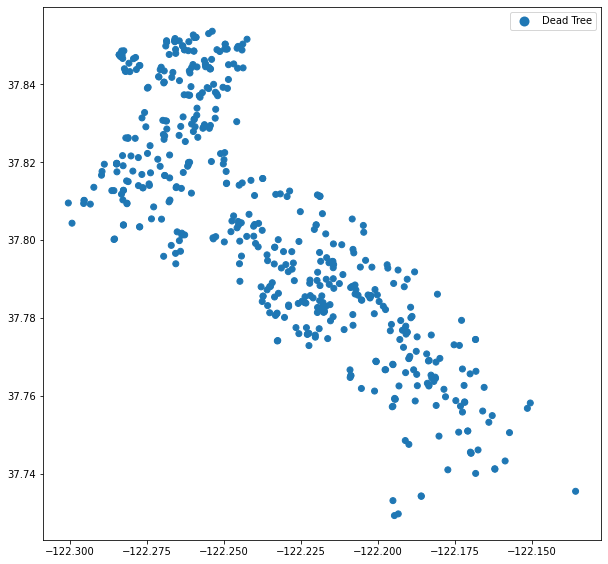

In [14]:
oakt_deadmap.plot(figsize=(10,10),
         column='DEAD',
         cmap='tab20',
         legend=True)


## Excited to see that it worked. Now onto some other lists and adding basemaps, etc.

## I will also have to convert to Mercator projection so the map doesn't look distorted. 

#### <u>Below I will create a list for:</u> 

#### - Maple species as a test to see how the list/renameing works and because the maple tree genus is fairly easy to pick out of the list

#### - Dead trees under the 'DEAD' category <b><u>and</u></b> 'SPECIES' category because I want to see if there are discrepencies between the data in each column

#### - Fruit trees because I find it interesting that Oakland has these in their public space and their presence makes me want to ask more questions about who they are accessible to and whether they are providing fruit to the public



In [15]:
list=['Acer sp', 'Acer palmatum','Acer negundo', 'Acer rubrum','Acer macrophyllum','Acer buergeranum','Acer saccharinum',]
list=oakt.SPECIES.isin(list)
oakt_maple_species=oakt[list]

In [16]:
oakt_maple_species["SPECIES"].replace({"Acer sp": "Common Maple", 
                                  "Acer palmatum": "Japanese Maple",
                                  "Acer negundo":"Boxelder Maple",
                                  "Acer rubrum":"Red Maple",
                                 "Acer macrophyllum":"Bigleaf Maple",
                                 "Acer buergeranum":"Trident Maple",
                                 "Acer saccharinum":"Silver Maple",}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
list=['Dead']
list=oakt.SPECIES.isin(list)
oakt_dead_species=oakt[list]

In [18]:
list=['Platanus acerifolia', 
      'Liquidambar styraciflua', 
      'Pyrus calleryana cvs', 
      'Prunus cerasifera/blireiana', 
      'Lagerstroemia indica', 
      'Pyrus kawakami', 
      'Magnolia grandiflora', 
      'Fraxinus o. `Raywood',  
      'Pistacia chinensis']
list=oakt.SPECIES.isin(list)
oakt_lowest=oakt[list]

#### ^Ignore this one, it was an idea that isn't fully fleshed out yet

In [19]:
list=['Cupressus sp', 'Cupressus sempervirens', 
      'Pinus sp','Pinus pinea', 'Pinus radiata', 'Pinus canariensis','Pinus thunbergiana', 
      'Juniperus sp',
      'Sequoia sempervirens',
      'Calocedrus decurrens', 'Cedrus deodara',   ]
list=oakt.SPECIES.isin(list)
oakt_conifers=oakt[list]

In [20]:
oakt_conifers["SPECIES"].replace({"Cupressus sp": "Common Cypress", 
                                  "Cupressus sempervirens": "Mediterranean Cypress",
                                  "Pinus sp":"Common Pine",
                                  "Pinus pinea":"Stone Pine",
                                 "Pinus radiata":"Monetery Pine",
                                 "Pinus canariensis":"Canary Island Pine",
                                 "Pinus thunbergiana":"Japanese Black Pine",
                                 "Juniperus sp":"Common Juniper",
                                 "Sequoia sempervirens":"Coastal Redwood",
                                 "Calocedrus decurrens":"Incense Cedar",
                                 "Cedrus deodara":"Deodar Cedar"}, inplace=True)

In [21]:
list=['Banana', 'Fig Tree', 'Guava', 'Apricot tree', 'Ficus carica', 'Fruit tree']
list=oakt.SPECIES.isin(list)
oakt_fruit=oakt[list]



In [22]:
oakt_fruit["SPECIES"].replace({"Banana" : "Banana Tree", 
                                  "Fig Tree" : "Fig Tree",
                                  "Guava" : "Guava Tree",
                                  "Apricot Tree" : "Apricot Tree",
                                 "Fruit Tree" : "Fruit Tree",
                                "Ficus carica" : "Fig Tree",
                              }, inplace=True)

<AxesSubplot:>

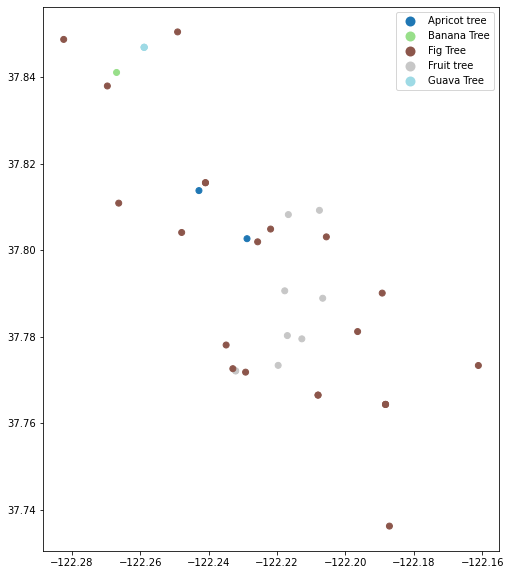

In [23]:
oakt_fruit.plot(figsize=(10,10),
         column='SPECIES',
         cmap='tab20',
               legend=True)

## Looking good so far. Next I will be doing projection conversion then moving on to adding basemaps, titles, legends, etc

In [24]:
oakt_fruit_mercator = oakt_fruit.to_crs(epsg=3857)

oakt_deadmap_mercator = oakt_deadmap.to_crs(epsg=3857)

oakt_dead_species_mercator = oakt_dead_species.to_crs(epsg=3857)

oakt_maple_species_mercator = oakt_maple_species.to_crs(epsg=3857)

oakt_lowest_mercator = oakt_lowest.to_crs(epsg=3857)

oakt_conifers_mercator = oakt_conifers.to_crs(epsg=3857)

(-13613084.713287916,
 -13598242.428018367,
 4541430.753927154,
 4559118.371474976)

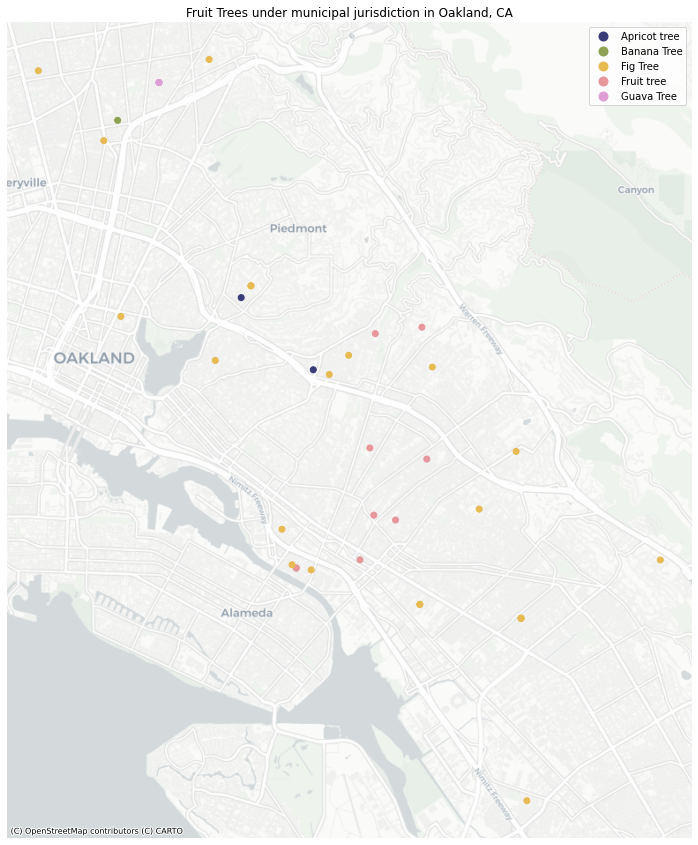

In [25]:
ax = oakt_fruit_mercator.plot(column='SPECIES',cmap="tab20b", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_fruit_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.set_title('Fruit Trees under municipal jurisdiction in Oakland, CA')
ax.axis('off')

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

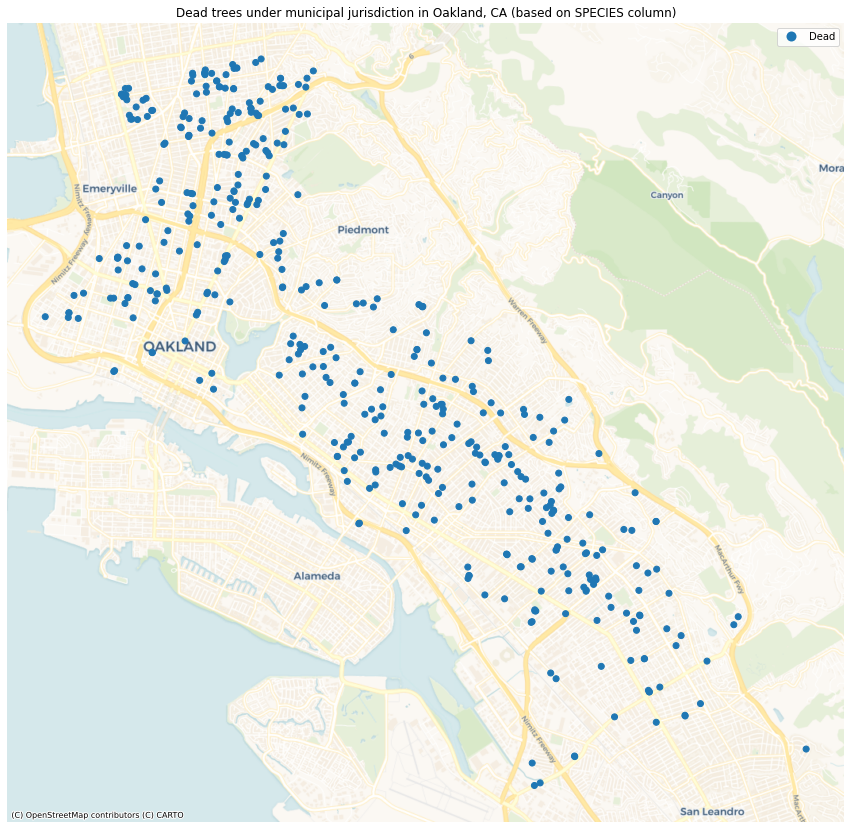

In [26]:
ax = oakt_dead_species_mercator.plot(column='SPECIES',cmap="tab20", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_dead_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Dead trees under municipal jurisdiction in Oakland, CA (based on SPECIES column)')
ax.axis('off')

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

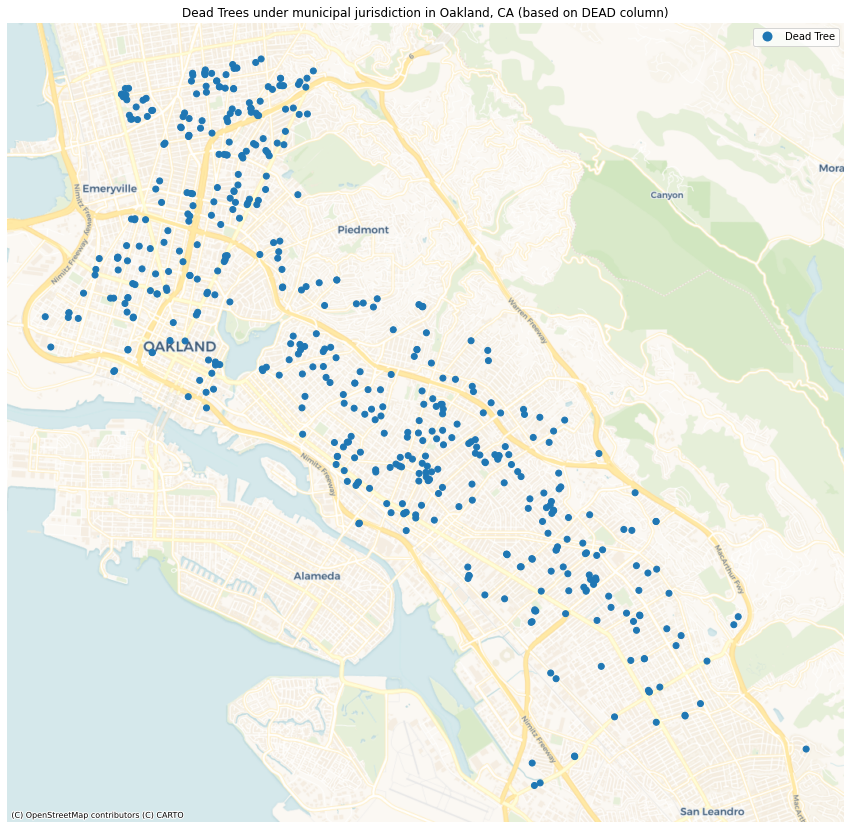

In [27]:
ax = oakt_deadmap_mercator.plot(column='DEAD', figsize=(15, 15), cmap="tab20", legend=True,)
ctx.add_basemap(ax, crs=oakt_deadmap_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Dead Trees under municipal jurisdiction in Oakland, CA (based on DEAD column)')
ax.axis('off')

## ^From a quick look it doesn't seem like there are any discrepencies between the dead trees in DEAD column and SPECIES column. 

#### I don't really know why they would include this value under SPECIES but I'm also not thinking too hard about it cause I need to get into some folium stuff, so there ya go

(-13615524.59856178, -13595224.544737143, 4540519.06775298, 4560243.283530435)

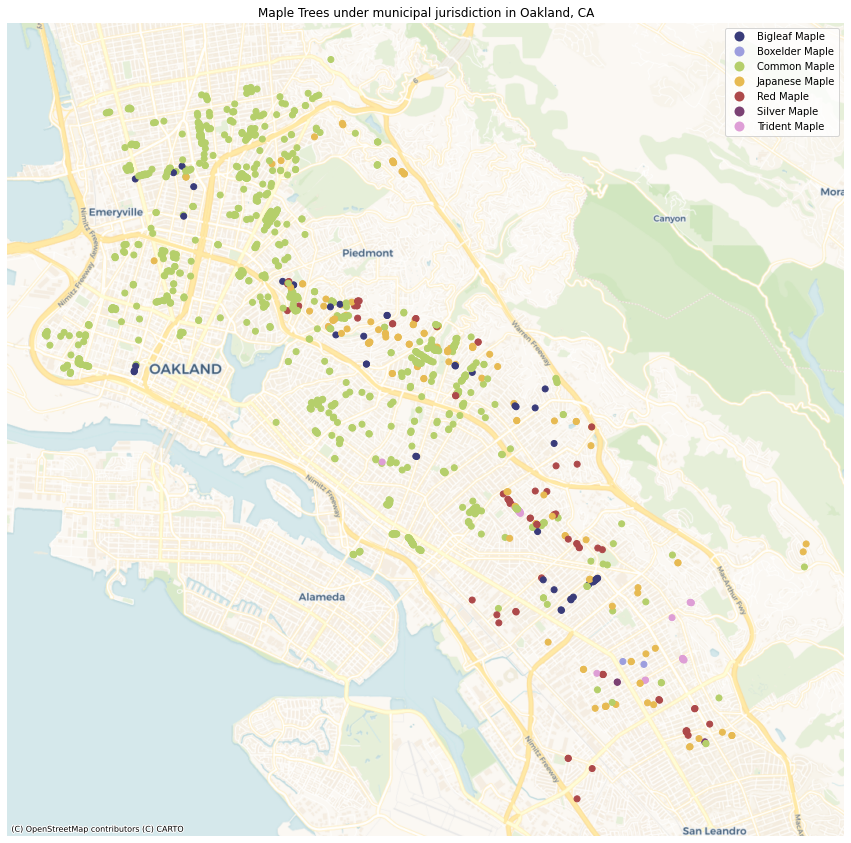

In [28]:
ax = oakt_maple_species_mercator.plot(column='SPECIES', figsize=(15, 15), cmap="tab20b", legend=True)
ctx.add_basemap(ax, crs=oakt_maple_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Maple Trees under municipal jurisdiction in Oakland, CA')
ax.axis('off')

(-13615309.46443634, -13594820.121701268, 4540784.831160204, 4559368.73495584)

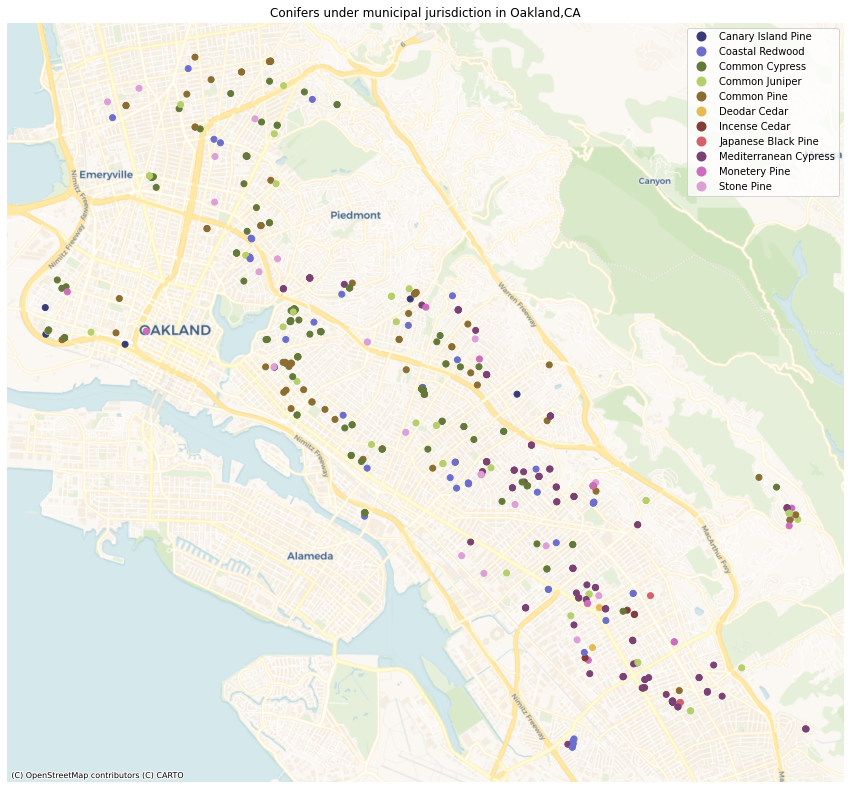

In [29]:
ax = oakt_conifers_mercator.plot(column='SPECIES', figsize=(15, 15), cmap="tab20b", legend=True)
ctx.add_basemap(ax, crs=oakt_conifers_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Conifers under municipal jurisdiction in Oakland,CA')

ax.axis('off')

## Okay time to get an interactive map going...

### This will be as much of a copy/paste from the class lab as I can get to work. Let's see if I can get Oakland's Conifers onto a map here:

In [30]:
m = folium.Map()
m

In [31]:
latitude = 37.804363

longitude = -122.271111


### Okay first I'm going to do some quick checking of my data. I thought I needed the SPECIES Dtype to be 'object' but I actually am unclear on that now that I'm saying it out loud. 

In [32]:
oakt_conifers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 477 entries, 41 to 42543
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       477 non-null    int64   
 1   SEGMENTID      477 non-null    object  
 2   PLANAREAID     477 non-null    object  
 3   COUNCILDIS     477 non-null    object  
 4   SURVEYOR       477 non-null    object  
 5   COLLDATE       477 non-null    object  
 6   COLLTIME       477 non-null    object  
 7   LOCATION       477 non-null    float64 
 8   TREE           477 non-null    object  
 9   WELL           477 non-null    object  
 10  WELLWIDTH      477 non-null    object  
 11  WELLLENGTH     477 non-null    object  
 12  PAREAWIDTH     477 non-null    object  
 13  LOWWELL        477 non-null    object  
 14  HVW            477 non-null    object  
 15  STUMP          477 non-null    object  
 16  BRKNHNGLMB     477 non-null    object  
 17  OPENCAVITY     477 non-n

### Next I will check that my list and names are still there and that the dataset looks the way I want it to.

In [33]:
oakt_conifers.SPECIES.value_counts()

Common Cypress           152
Mediterranean Cypress    109
Common Pine               69
Coastal Redwood           48
Common Juniper            46
Stone Pine                20
Monetery Pine             17
Canary Island Pine         6
Incense Cedar              4
Japanese Black Pine        4
Deodar Cedar               2
Name: SPECIES, dtype: int64

In [34]:
oakt_conifers.head()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
41         42      1348          6          6        8   7/7/06  14:16:30   
83         84       555          6          4       11  6/26/06  15:31:02   
132       133       602          6          6        7  6/27/06  14:15:31   
176       177       582          5          5        4  4/20/06  09:54:39   
180       181      1026          5          5       11  4/26/06  12:13:05   

      LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
41   774.98126   -1    0         0          0          3    None   0     0   
83    39.00000   -1    0         0          0          4    None   0     0   
132   80.35884   -1    0         0          0          2    None   0     0   
176  416.00000   -1    0         0          0          3    None   0     0   
180  279.04537   -1    0         0          0          6    None   0     0   

    BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN                SPECIES  \
41           0          0         0    None     None  Mediterranean Cypress   
83           0          0         0    None     None         Common Juniper   
132          0          0         0    None     None  Mediterranean Cypress   
176          0          0         0    None     None            Common Pine   
180          0          0         0    None     None        Coastal Redwood   

    WATERMET FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
41         0       0        0         0        0    Medium  None          0   
83         0       0        0         0        0     Large  None          0   
132        0       0        0         0        0     Small  None          0   
176        0       0        0         0        0     Small  None          0   
180        0       0        0         0        0  XX-large  None          0   

                  TREE_KEY  ADDRNUM        STNAME IS_PROBLEM DEAD DEADWOOD  \
41    TREE_7/7/06_14:16:30     1354       53RD AV      False    0     None   
83    TREE_6/26/06_15:31:2     4533  BROOKDALE AV      False    0     None   
132  TREE_6/27/06_14:15:31     4535    REDDING ST      False    0     None   
176  TREE_4/20/06_09:54:39     2011       38TH AV      False    0     None   
180   TREE_4/26/06_12:13:5     1434       28TH AV      False    0     None   

    ARB_CMNT     ARB_TIME  ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM FACILITYID  \
41      None  10:38:10 AM  10/18/06        1     Res             2      70997   
83      None  11:00:22 AM  10/24/06        1     Res             3      70598   
132     None   8:28:42 AM  10/20/06        1     Res             1      70280   
176     None   1:03:20 PM   7/27/06        1     Res             1      68085   
180     None  10:58:18 AM   7/13/06        1     Res             5      68117   

    LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE INSTALL_ID  \
41      None         None        None      None          None       None   
83      None         None        None      None          None       None   
132     None         None        None      None          None       None   
176     None         None        None      None          None       None   
180     None         None        None      None          None       None   

    DESIGNATION                     geometry  
41         None  POINT (-122.20649 37.76765)  
83         None  POINT (-122.20202 37.78056)  
132        None  POINT (-122.19312 37.78450)  
176        None  POINT (-122.21484 37.78049)  
180        None  POINT (-122.22925 37.78049)

In [35]:
desired_columns=['LOCATION','SPECIES','geometry']
oakt_conifers_trimmed=oakt_conifers[desired_columns].copy()

In [36]:
oakt_conifers_trimmed.head()

LOCATION                SPECIES                     geometry
41   774.98126  Mediterranean Cypress  POINT (-122.20649 37.76765)
83    39.00000         Common Juniper  POINT (-122.20202 37.78056)
132   80.35884  Mediterranean Cypress  POINT (-122.19312 37.78450)
176  416.00000            Common Pine  POINT (-122.21484 37.78049)
180  279.04537        Coastal Redwood  POINT (-122.22925 37.78049)

### I was getting errors because the geometry column wasn't allowing me to plot onto folium (I think) so first I will have to convert to separate lat/long values and then go from there

In [37]:
oakt_conifers_trimmed['lon']=oakt_conifers_trimmed.geometry.x
oakt_conifers_trimmed['lat']=oakt_conifers_trimmed.geometry.y

In [46]:
m = folium.Map(location=[latitude,longitude])

In [47]:
for index, row in oakt_conifers_trimmed.iterrows():
    # add folium marker code
    folium.Marker([row.lat, row.lon], popup=row.SPECIES, tooltip=row.SPECIES).add_to(m)
m

for index, row in oakt_conifers_trimmed.iterrows():
    print(row.SPECIES, row.lat, row.lon)

Mediterranean Cypress 37.7676518849616 -122.206493122434
Common Juniper 37.7805563107474 -122.202020767499
Mediterranean Cypress 37.7844995786349 -122.193118994641
Common Pine 37.7804862355713 -122.214836456955
Coastal Redwood 37.7804897288215 -122.229253272486
Coastal Redwood 37.7777657941497 -122.20694606162
Mediterranean Cypress 37.7770895666079 -122.197293519622
Common Cypress 37.7886504803588 -122.212731603284
Common Juniper 37.7879008154743 -122.21401964802
Common Cypress 37.7933443344749 -122.21666259645
Common Cypress 37.7944825348999 -122.217064101088
Common Pine 37.7820345711186 -122.230148794118
Common Pine 37.7919852186336 -122.241360631323
Common Cypress 37.8060611382604 -122.246092436431
Common Cypress 37.7897094162536 -122.244681329281
Common Cypress 37.8037715823119 -122.241843249083
Common Cypress 37.8042068645711 -122.239456633294
Common Cypress 37.8059451548923 -122.246178446292
Common Cypress 37.8060729734118 -122.246083659887
Common Cypress 37.8060469362552 -122.24

### Okay great so now I have this huge list and it looks like I've got my lat/long values for every tree and now I'm going to put it on a map hopefully...

In [40]:
for index, row in oakt_conifers_trimmed.iterrows():
    folium.Marker([row.lat, row.lon], popup=row.SPECIES, tooltip=row.SPECIES).add_to(m)
m

### Cool... but it would be cooler with some colour coordination if I can figure that out.

In [41]:
oakt_conifers_trimmed['color'] = ''

In [42]:
oakt_conifers_trimmed.loc[oakt_conifers_trimmed['SPECIES'] == 'Common Cypress']


LOCATION         SPECIES                     geometry         lon  \
433     379.00000  Common Cypress  POINT (-122.21273 37.78865) -122.212732   
676     198.72641  Common Cypress  POINT (-122.21666 37.79334) -122.216663   
680     109.00000  Common Cypress  POINT (-122.21706 37.79448) -122.217064   
943     296.00000  Common Cypress  POINT (-122.24609 37.80606) -122.246092   
944     109.27066  Common Cypress  POINT (-122.24468 37.78971) -122.244681   
948     324.00000  Common Cypress  POINT (-122.24184 37.80377) -122.241843   
989      95.44913  Common Cypress  POINT (-122.23946 37.80421) -122.239457   
1018    247.00000  Common Cypress  POINT (-122.24618 37.80595) -122.246178   
1019    301.00000  Common Cypress  POINT (-122.24608 37.80607) -122.246084   
1093    290.00000  Common Cypress  POINT (-122.24610 37.80605) -122.246103   
1172      5.00000  Common Cypress  POINT (-122.24427 37.80623) -122.244271   
1545    402.00000  Common Cypress  POINT (-122.25071 37.84771) -122.250714   
1684    458.58776  Common Cypress  POINT (-122.25634 37.82990) -122.256338   
2120    431.00000  Common Cypress  POINT (-122.27664 37.83100) -122.276643   
2163   1015.00000  Common Cypress  POINT (-122.27564 37.82928) -122.275643   
2500    191.00000  Common Cypress  POINT (-122.29640 37.81174) -122.296398   
5738    686.08924  Common Cypress  POINT (-122.22597 37.78379) -122.225969   
6004    187.72641  Common Cypress  POINT (-122.21668 37.79332) -122.216682   
6008     54.00000  Common Cypress  POINT (-122.21716 37.79435) -122.217164   
6062     43.00000  Common Cypress  POINT (-122.21718 37.79433) -122.217184   
6063     10.58145  Common Cypress  POINT (-122.21723 37.79421) -122.217230   
6064     39.58145  Common Cypress  POINT (-122.21714 37.79417) -122.217145   
6065     65.58145  Common Cypress  POINT (-122.21707 37.79413) -122.217068   
6103    387.00000  Common Cypress  POINT (-122.21192 37.79863) -122.211917   
6254    122.44913  Common Cypress  POINT (-122.23937 37.80418) -122.239369   
6463     92.00000  Common Cypress  POINT (-122.24528 37.80788) -122.245279   
6464     76.00000  Common Cypress  POINT (-122.24532 37.80785) -122.245323   
6465     61.00000  Common Cypress  POINT (-122.24536 37.80783) -122.245365   
6466     48.00000  Common Cypress  POINT (-122.24540 37.80781) -122.245404   
6467     64.24951  Common Cypress  POINT (-122.24549 37.80792) -122.245486   
7196    382.46008  Common Cypress  POINT (-122.25571 37.83469) -122.255707   
8269    151.00000  Common Cypress  POINT (-122.23586 37.84364) -122.235856   
8301    144.00000  Common Cypress  POINT (-122.23588 37.84365) -122.235877   
9190     41.22003  Common Cypress  POINT (-122.18406 37.76723) -122.184056   
10544   102.00000  Common Cypress  POINT (-122.21320 37.80354) -122.213202   
10861   417.26497  Common Cypress  POINT (-122.19959 37.77471) -122.199589   
11115   309.34438  Common Cypress  POINT (-122.22980 37.77275) -122.229800   
11214   321.34438  Common Cypress  POINT (-122.22976 37.77274) -122.229763   
11436    48.58145  Common Cypress  POINT (-122.21712 37.79416) -122.217118   
11437    77.58145  Common Cypress  POINT (-122.21703 37.79412) -122.217033   
11438   119.58145  Common Cypress  POINT (-122.21691 37.79406) -122.216909   
11665   128.27066  Common Cypress  POINT (-122.24464 37.78975) -122.244642   
11725    98.98981  Common Cypress  POINT (-122.24453 37.79982) -122.244526   
11736   527.00000  Common Cypress  POINT (-122.25117 37.80286) -122.251171   
11824   104.98981  Common Cypress  POINT (-122.24451 37.79983) -122.244511   
11835    13.00000  Common Cypress  POINT (-122.24551 37.80777) -122.245514   
11836   190.24951  Common Cypress  POINT (-122.24526 37.80821) -122.245255   
11839   184.00000  Common Cypress  POINT (-122.24501 37.80801) -122.245011   
11909   278.00000  Common Cypress  POINT (-122.24612 37.80602) -122.246124   
12409   356.46008  Common Cypress  POINT (-122.25579 37.83471) -122.255790   
12508   333.46008  Common Cypre

In [43]:
oakt_conifers_trimmed.loc[oakt_conifers_trimmed['SPECIES'] == 'Common Cypress', 'color'] = 'orange'


In [44]:
m

In [45]:
m.save('Coniferous_Trees_Oakland.html')

### Seems like I'm just adding new columns and not actually chaging the icon colours so for now this will do. Next step is figure out how to assign each tree type a colour cause that will make the map look a lot nicer and easier to read.